In [ ]:
#comparing GHI vs predGHI from 29.12.2022 
%%shell
jupyter nbconvert --to html /content/rms29_12.ipynb

[NbConvertApp] Converting notebook /content/rms29_12.ipynb to html
[NbConvertApp] Writing 380987 bytes to /content/rms29_12.html


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
predicted_values = pd.read_csv("/content/drive/MyDrive/Colab/JAWAD/MultRegLux/VALIDATION/04-01-2023/luxo.csv", sep=';')
predicted_values

,Time,Lux2 Regression,Lux4 Regression,Lux3 Regression,Lux6 Regression,Lux1 Regression,Lux8 Regression,Lux7 Regression,Lux0 Regression,Lux5 Regression,Predictions
0,2023-01-04 08:11:00,2502,1142,1522,1006,3654,957,988,400,1153,5.639696
1,2023-01-04 08:12:00,2512,1188,1532,1085,3662,1023,1054,400,1222,5.681774
2,2023-01-04 08:13:00,2521,1229,1541,1162,3667,1075,1104,400,1289,5.746583
3,2023-01-04 08:14:00,2524,1274,1553,1218,3669,1125,1149,400,1329,5.746583
4,2023-01-04 08:15:00,2520,1325,1567,1257,3666,1172,1188,400,1348,5.746583
...,...,...,...,...,...,...,...,...,...,...,...
476,2023-01-04 16:08:00,2388,827,1343,312,3583,145,192,400,512,5.451720
477,2023-01-04 16:09:00,2388,827,1343,312,3583,139,192,400,512,5.451720
478,2023-01-04 16:10:00,2388,827,1343,312,3583,130,192,400,512,5.451720
479,2023-01-04 16:11:00,2388,827,1343,312,3583,122,192,400,512,5.451720


In [ ]:
#actual_values = pd.read_csv('GHI2112.csv', sep=';')
actual_values = pd.read_csv('/content/drive/MyDrive/Colab/JAWAD/MultRegLux/VALIDATION/04-01-2023/GHI-data-2023-01-04.csv', sep=',')
actual_values['GHI'] = actual_values['GHI'].map(lambda x: x.rstrip('W/m²')).astype('float64')
actual_values


,Time,GHI
0,2023-01-04 08:11:00,7.54
1,2023-01-04 08:12:00,7.44
2,2023-01-04 08:13:00,7.25
3,2023-01-04 08:14:00,7.17
4,2023-01-04 08:15:00,6.98
...,...,...
476,2023-01-04 16:08:00,1.49
477,2023-01-04 16:09:00,1.80
478,2023-01-04 16:10:00,0.95
479,2023-01-04 16:11:00,1.28


In [ ]:
# Now concatenating 18,19,21,22,23,24 and 25th days data for both lux, ghui we will merge them
final_df=predicted_values.merge(actual_values, how='inner', on='Time')
final_df.head()

,Time,Lux2 Regression,Lux4 Regression,Lux3 Regression,Lux6 Regression,Lux1 Regression,Lux8 Regression,Lux7 Regression,Lux0 Regression,Lux5 Regression,Predictions,GHI
0,2023-01-04 08:11:00,2502,1142,1522,1006,3654,957,988,400,1153,5.639696,7.54
1,2023-01-04 08:12:00,2512,1188,1532,1085,3662,1023,1054,400,1222,5.681774,7.44
2,2023-01-04 08:13:00,2521,1229,1541,1162,3667,1075,1104,400,1289,5.746583,7.25
3,2023-01-04 08:14:00,2524,1274,1553,1218,3669,1125,1149,400,1329,5.746583,7.17
4,2023-01-04 08:15:00,2520,1325,1567,1257,3666,1172,1188,400,1348,5.746583,6.98


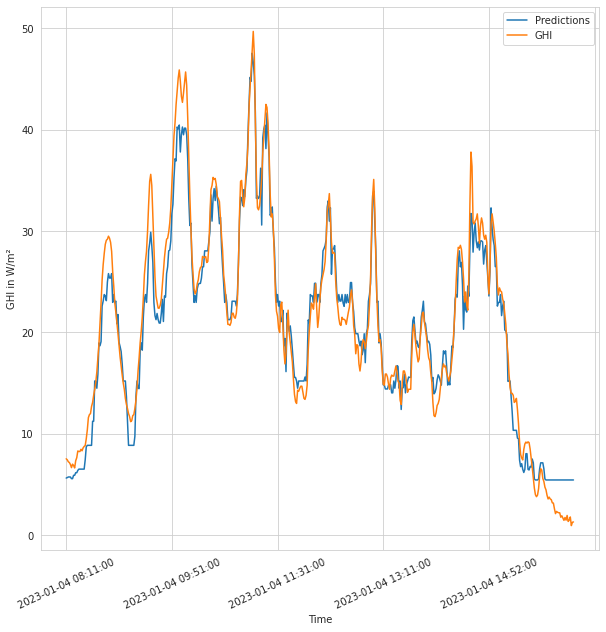

In [ ]:
import matplotlib.pyplot as plt

final_df.plot(x = 'Time', y=["Predictions", "GHI"], kind="line", figsize=(10, 10))

plt.xlabel('Time')
plt.ylabel('GHI in W/m²')
plt.xticks( rotation=25 )
plt.show()

In [ ]:
rmse = ((final_df["Predictions"] - final_df["GHI"]) ** 2).mean() ** .5
print("Root Mean Squared Error :", rmse)

Root Mean Squared Error : 2.1776693109286547
